<div style="background-color:purple;color:white;padding:10px;text-align:center;">
  <h1>Import Libraries and Load Data</h1> 
</div>


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/input/remote-work-and-mental-health/Impact_of_Remote_Work_on_Mental_Health.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

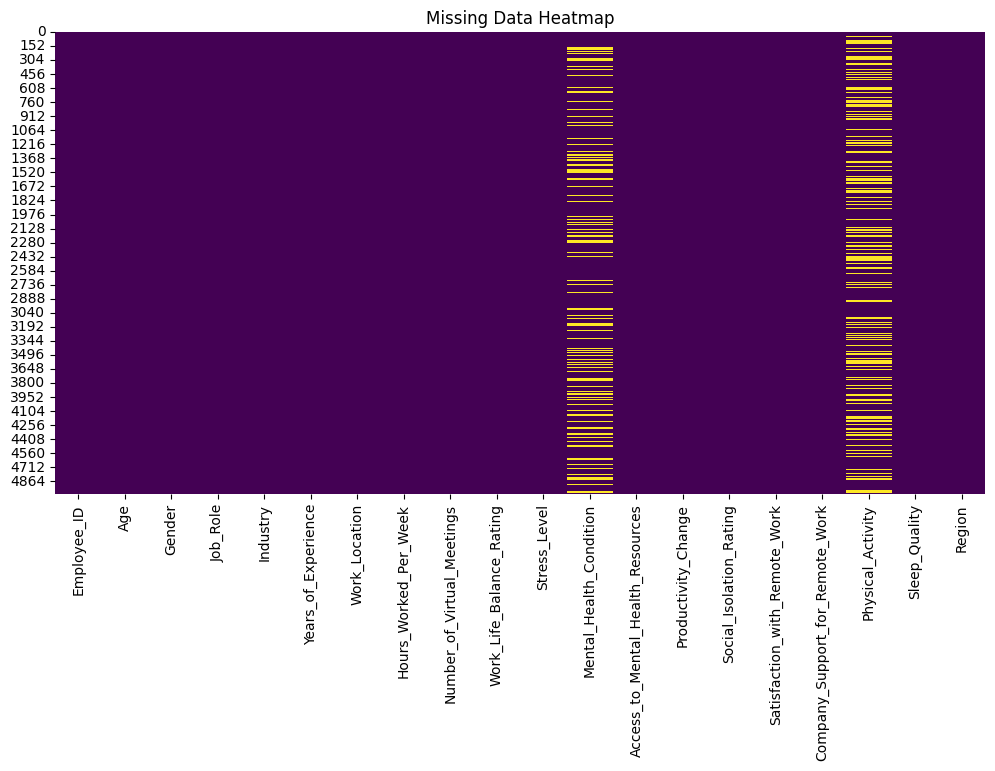

In [2]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [3]:
df['Mental_Health_Condition'].fillna('None', inplace=True)
df['Physical_Activity'].fillna(df['Physical_Activity'].mode()[0], inplace=True)


<div style="background-color:purple;color:white;padding:10px;text-align:center;">
  <h1>Bivariate Analysis</h1> 
</div> 

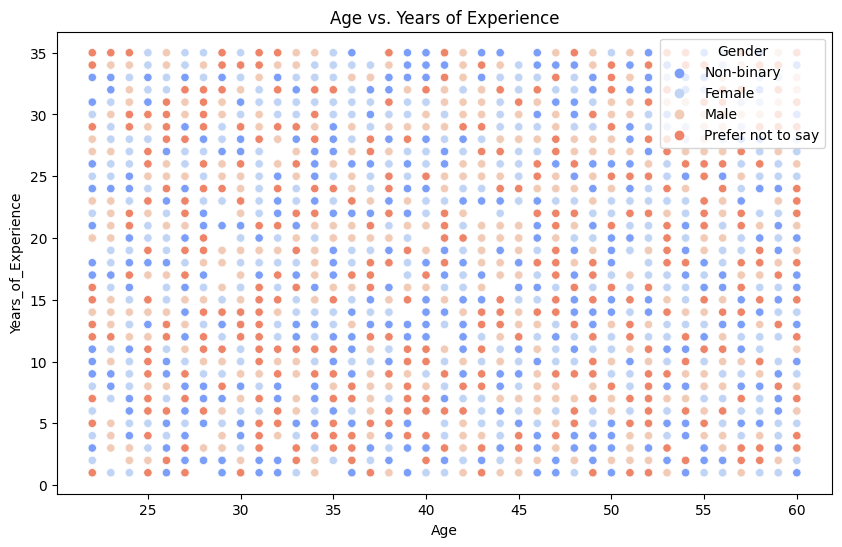

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Years_of_Experience', hue='Gender', palette='coolwarm')
plt.title('Age vs. Years of Experience')
plt.show()


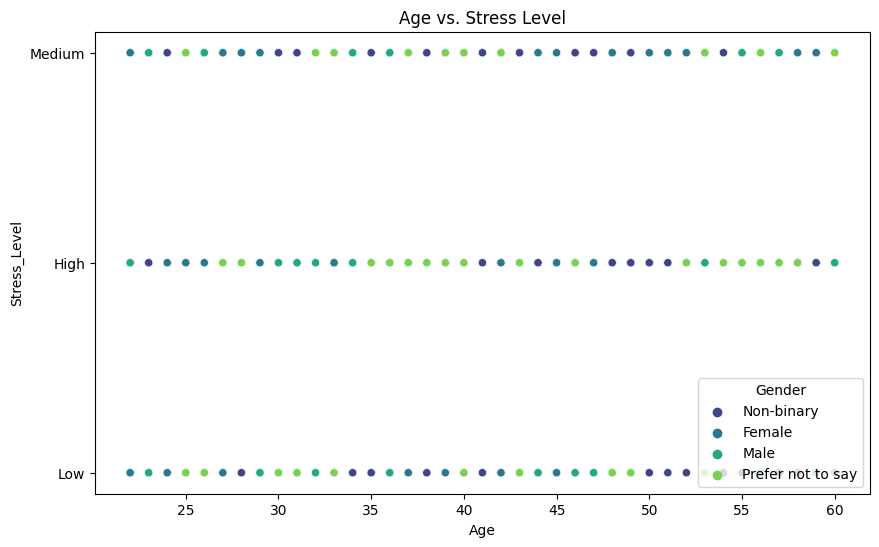

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Stress_Level', hue='Gender', palette='viridis')
plt.title('Age vs. Stress Level')
plt.show()

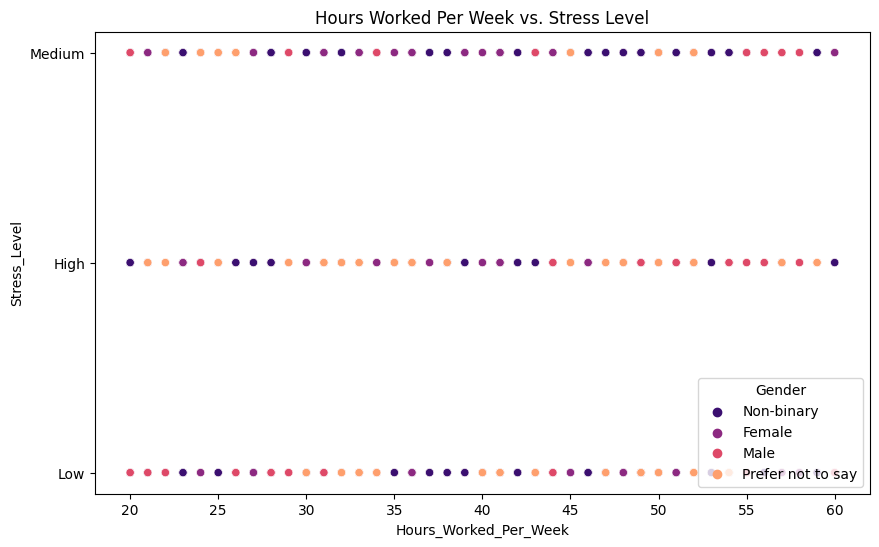

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Worked_Per_Week', y='Stress_Level', hue='Gender', palette='magma')
plt.title('Hours Worked Per Week vs. Stress Level')
plt.show()


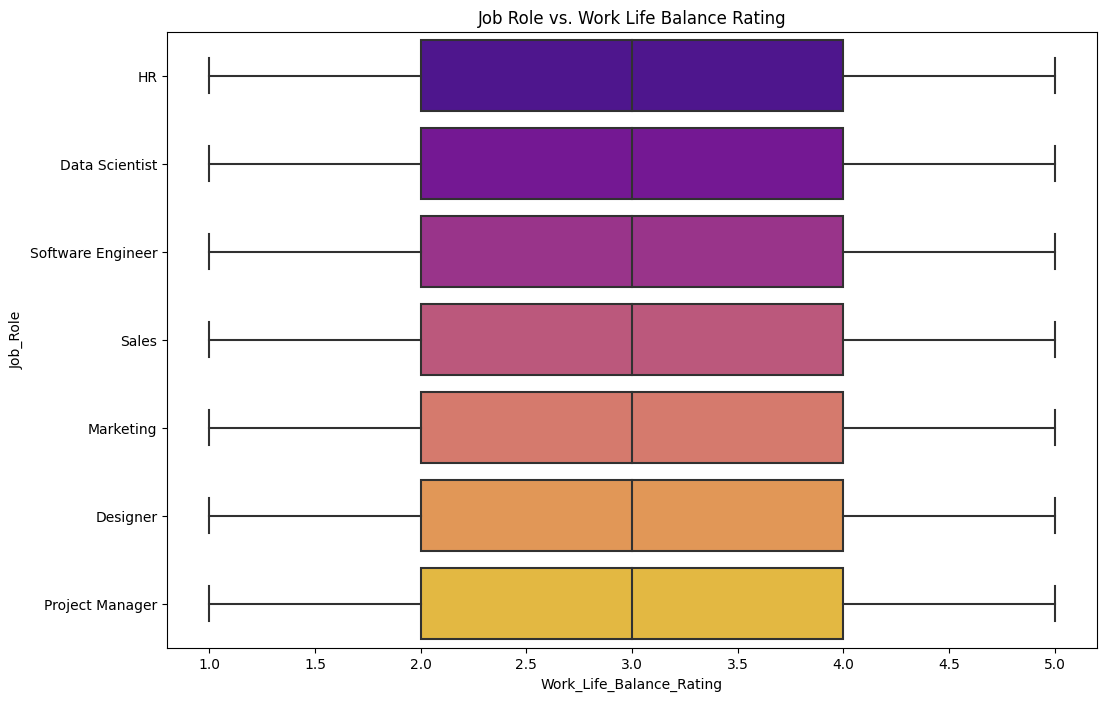

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Work_Life_Balance_Rating', y='Job_Role', palette='plasma')
plt.title('Job Role vs. Work Life Balance Rating')
plt.show()


In [8]:
if df['Stress_Level'].dtype == 'object':
    df['Stress_Level'] = df['Stress_Level'].astype('category').cat.codes

print(df.dtypes)


Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                           int8
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object


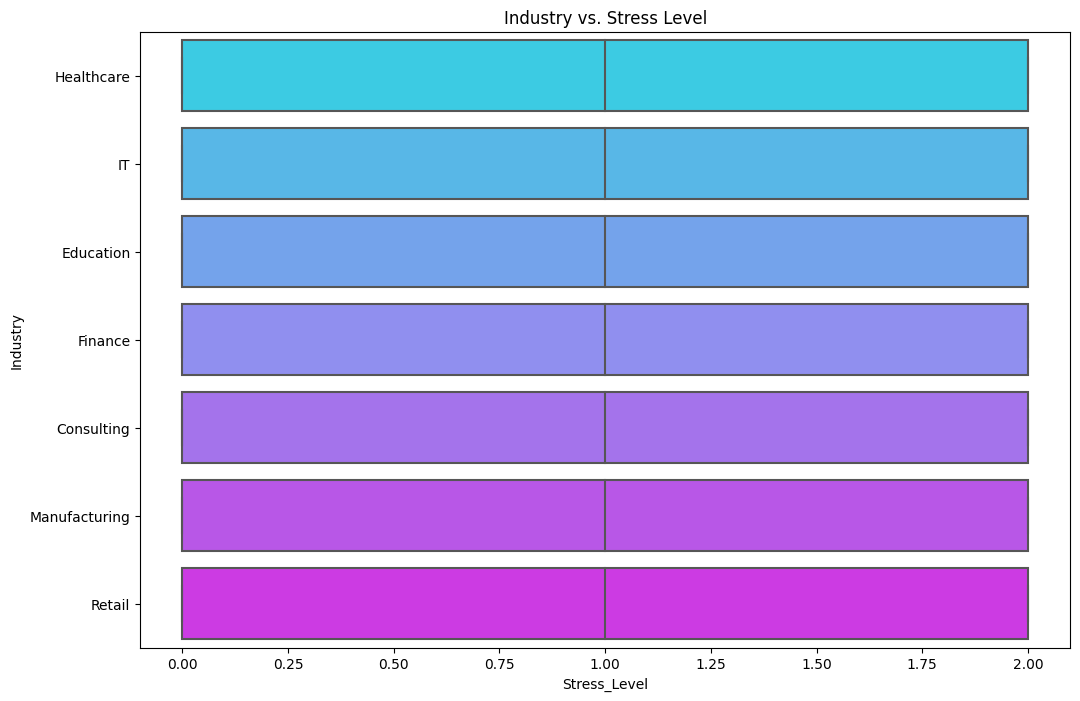

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Stress_Level', y='Industry', palette='cool')
plt.title('Industry vs. Stress Level')
plt.show()


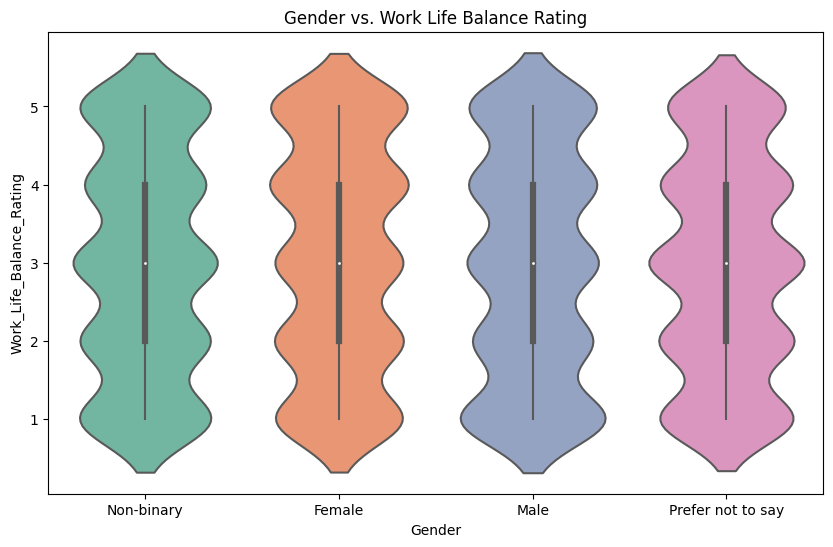

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='Work_Life_Balance_Rating', palette='Set2')
plt.title('Gender vs. Work Life Balance Rating')
plt.show()


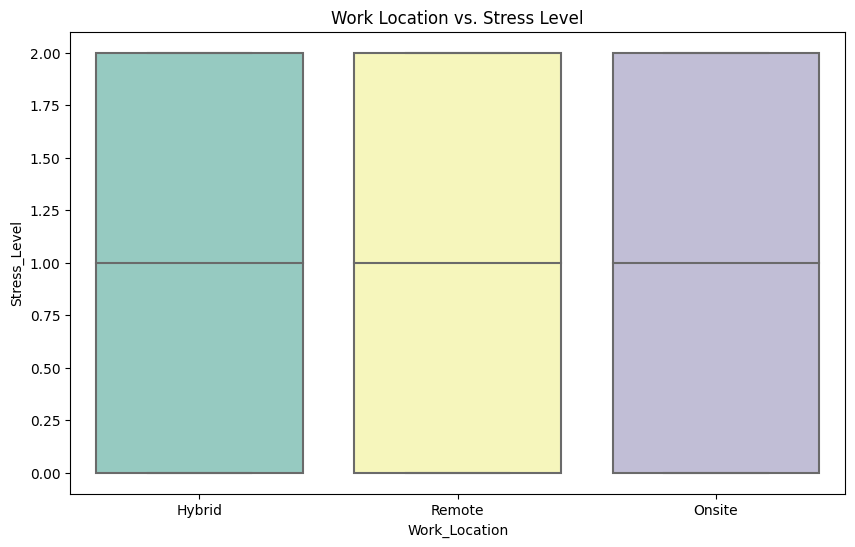

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Work_Location', y='Stress_Level', palette='Set3')
plt.title('Work Location vs. Stress Level')
plt.show()


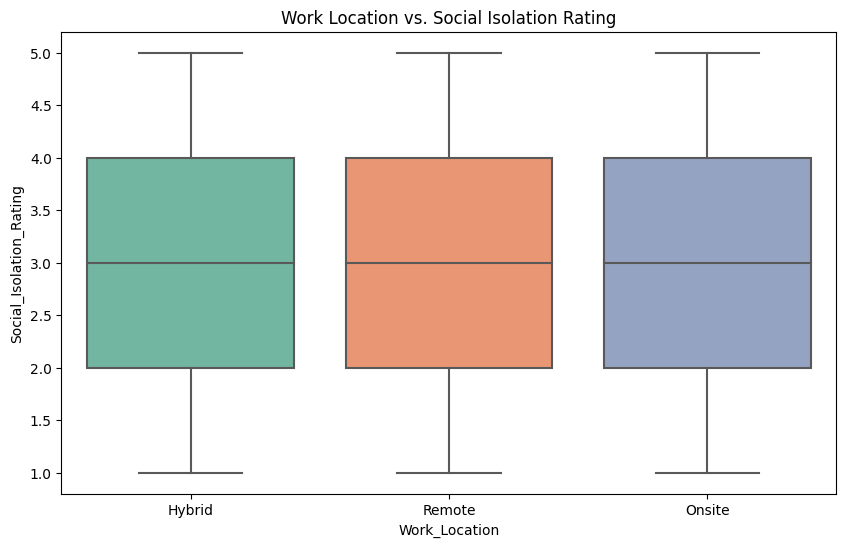

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Work_Location', y='Social_Isolation_Rating', palette='Set2')
plt.title('Work Location vs. Social Isolation Rating')
plt.show()


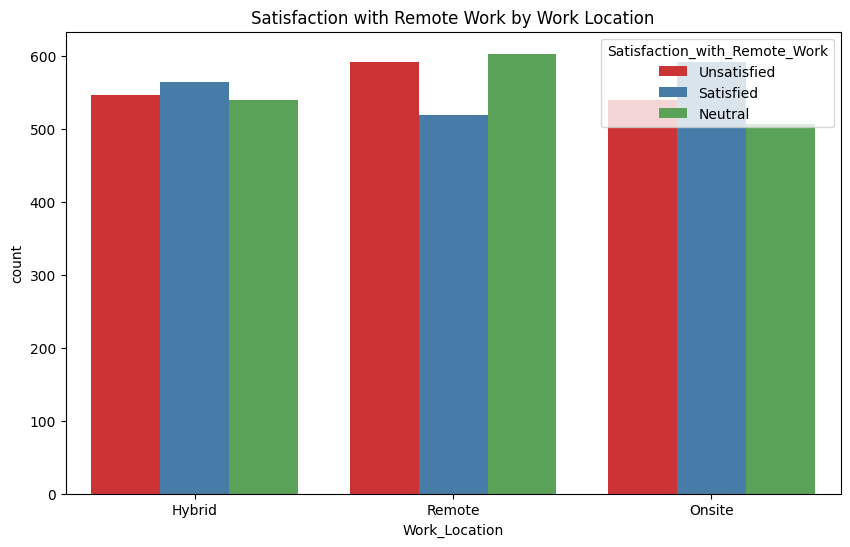

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Satisfaction_with_Remote_Work', palette='Set1')
plt.title('Satisfaction with Remote Work by Work Location')
plt.show()


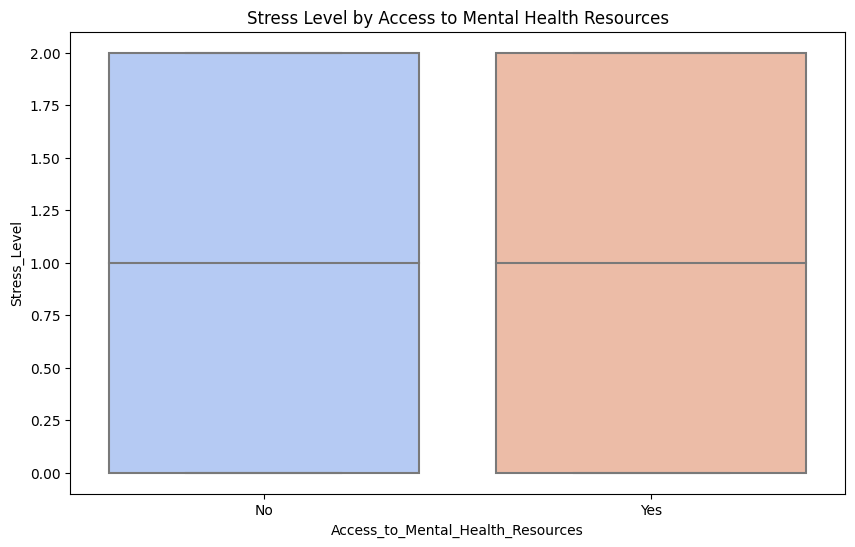

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Access_to_Mental_Health_Resources', y='Stress_Level', palette='coolwarm')
plt.title('Stress Level by Access to Mental Health Resources')
plt.show()


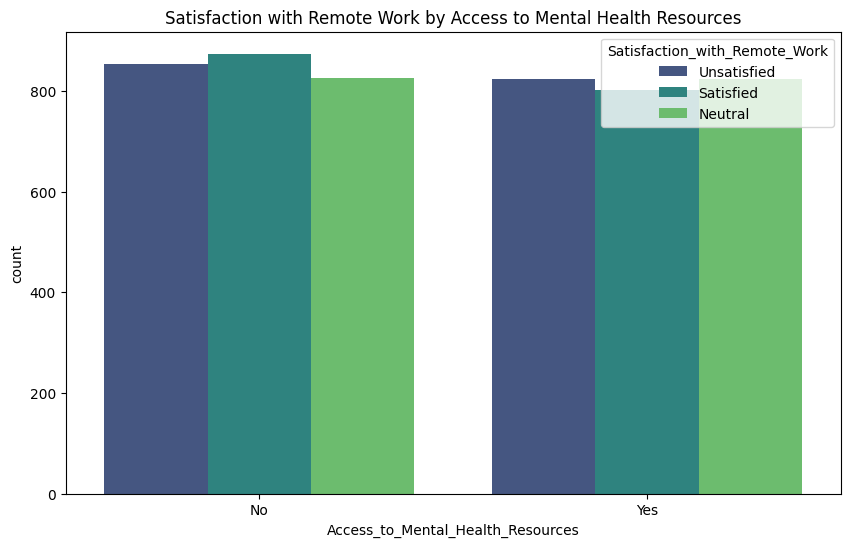

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Access_to_Mental_Health_Resources', hue='Satisfaction_with_Remote_Work', palette='viridis')
plt.title('Satisfaction with Remote Work by Access to Mental Health Resources')
plt.show()


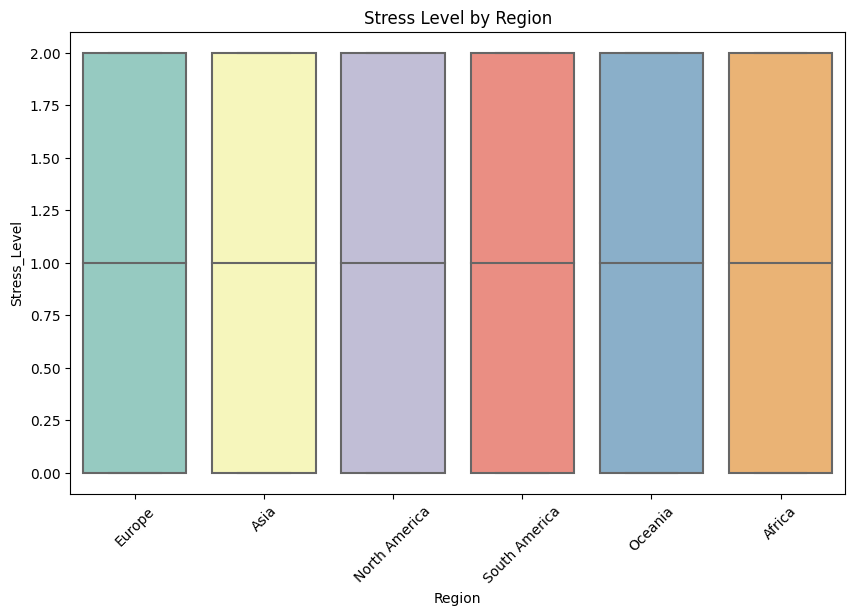

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Stress_Level', palette='Set3')
plt.title('Stress Level by Region')
plt.xticks(rotation=45)
plt.show()


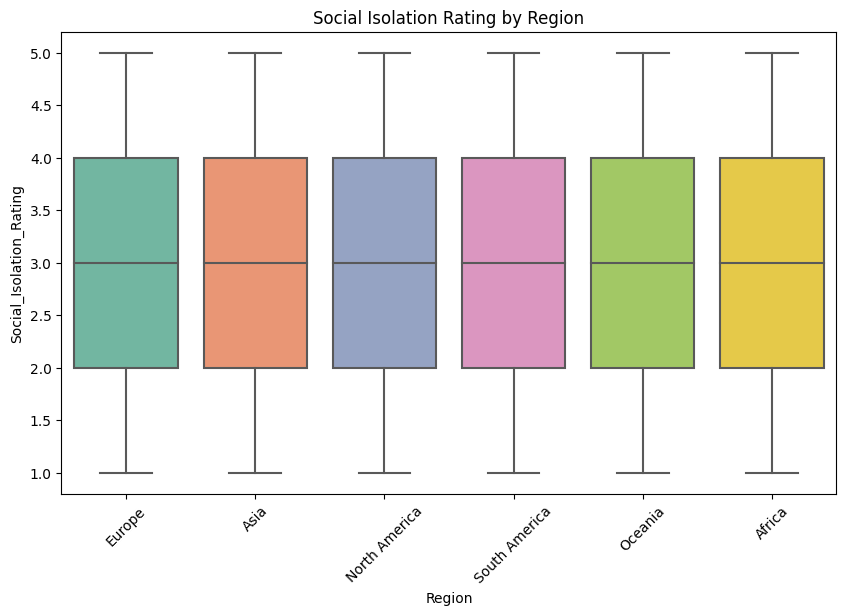

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Social_Isolation_Rating', palette='Set2')
plt.title('Social Isolation Rating by Region')
plt.xticks(rotation=45)
plt.show()


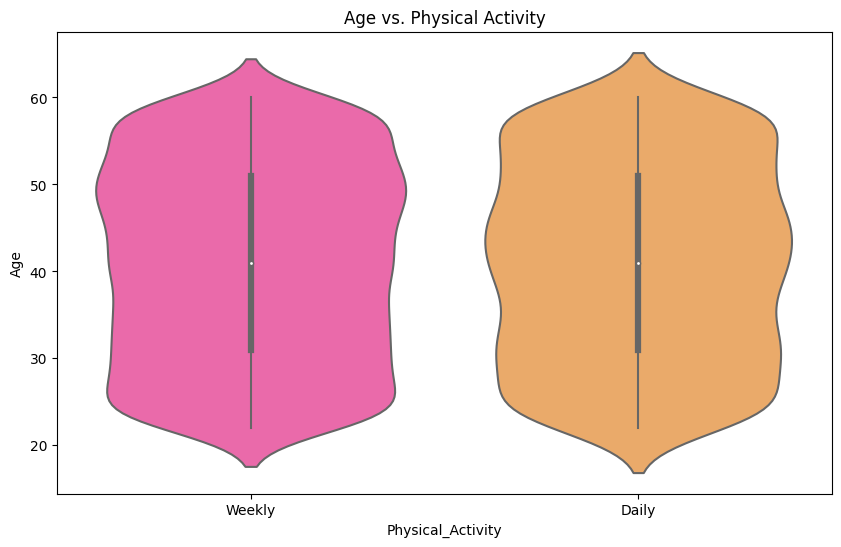

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Physical_Activity', y='Age', palette='spring')
plt.title('Age vs. Physical Activity')
plt.show()


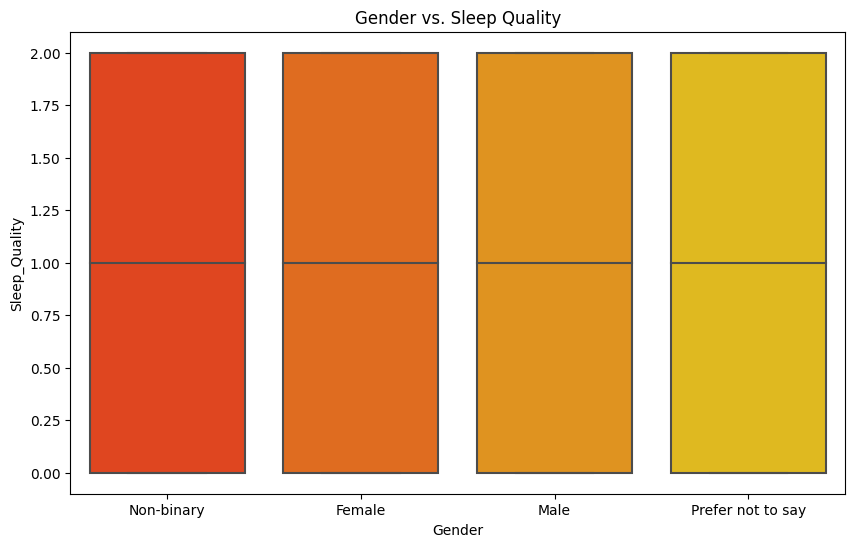

In [19]:
if df['Sleep_Quality'].dtype == 'object':
    df['Sleep_Quality'] = df['Sleep_Quality'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Sleep_Quality', palette='autumn')
plt.title('Gender vs. Sleep Quality')
plt.show()


<div style="background-color:purple;color:white;padding:10px;text-align:center;">
  <h1>Multivariate Analysis</h1> 
</div>


<Figure size 1200x1200 with 0 Axes>

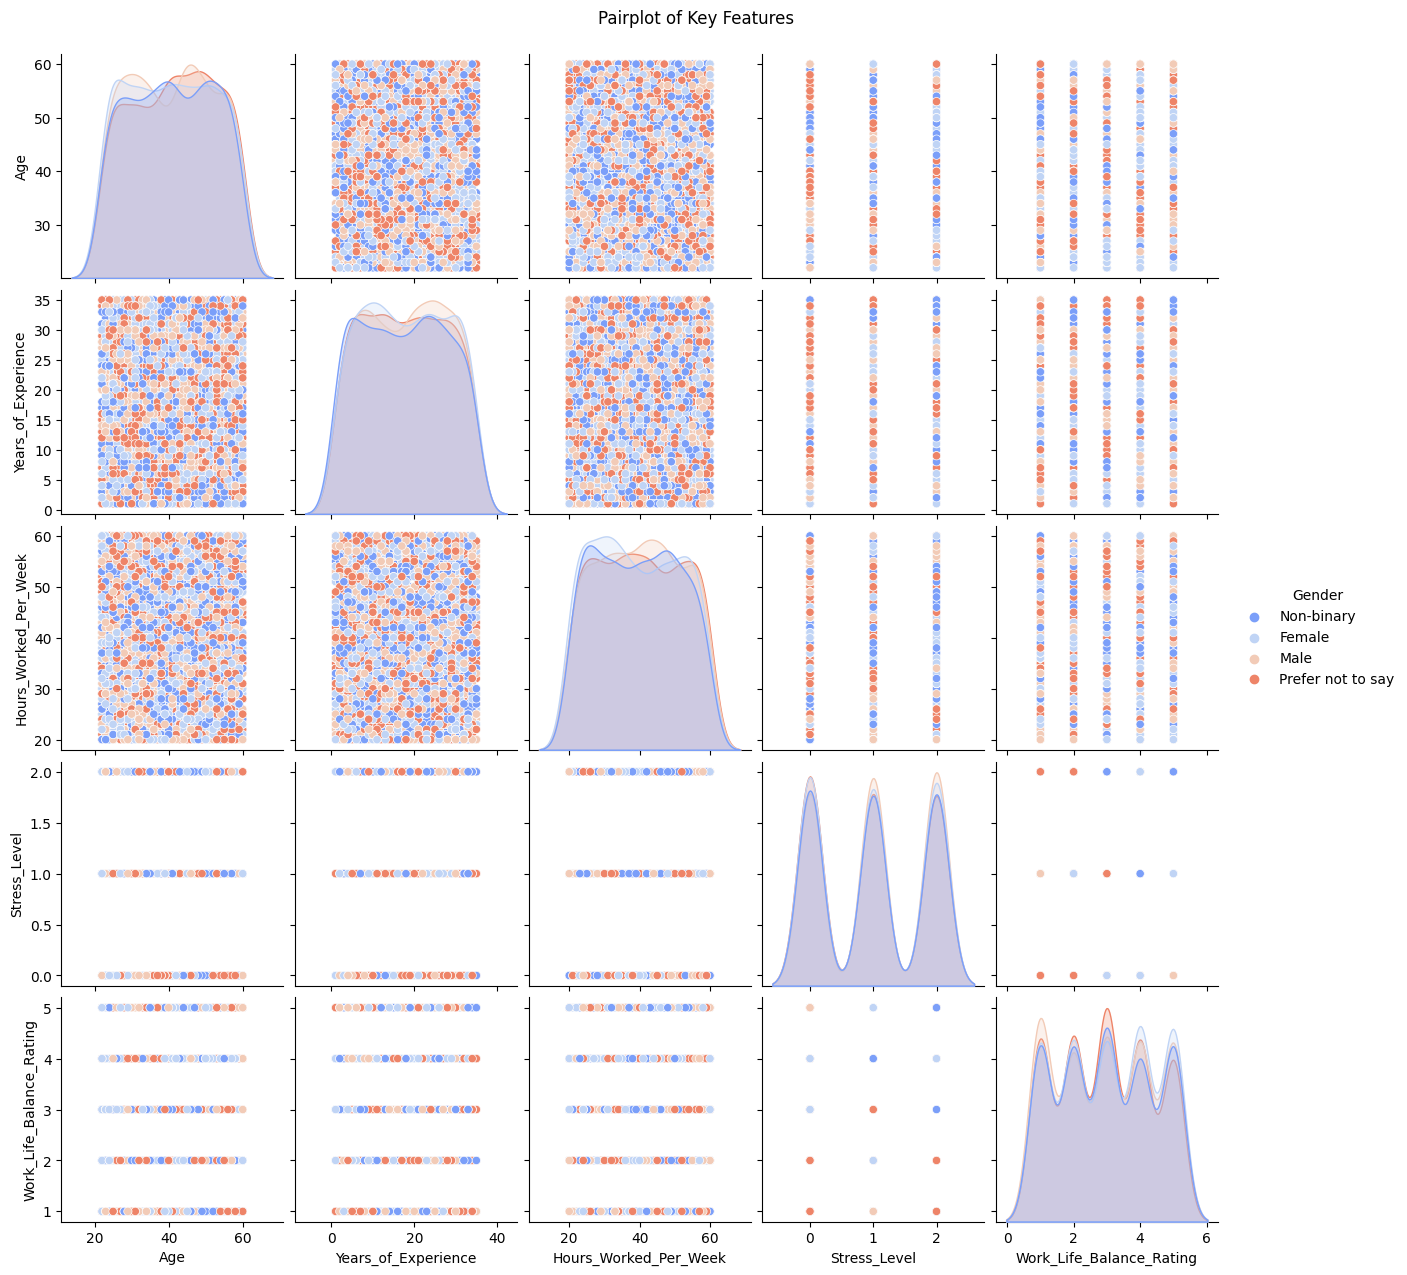

In [20]:
pairplot_columns = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 
                    'Stress_Level', 'Work_Life_Balance_Rating', 'Gender']

plt.figure(figsize=(12, 12))
sns.pairplot(df[pairplot_columns], hue='Gender', palette='coolwarm')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()



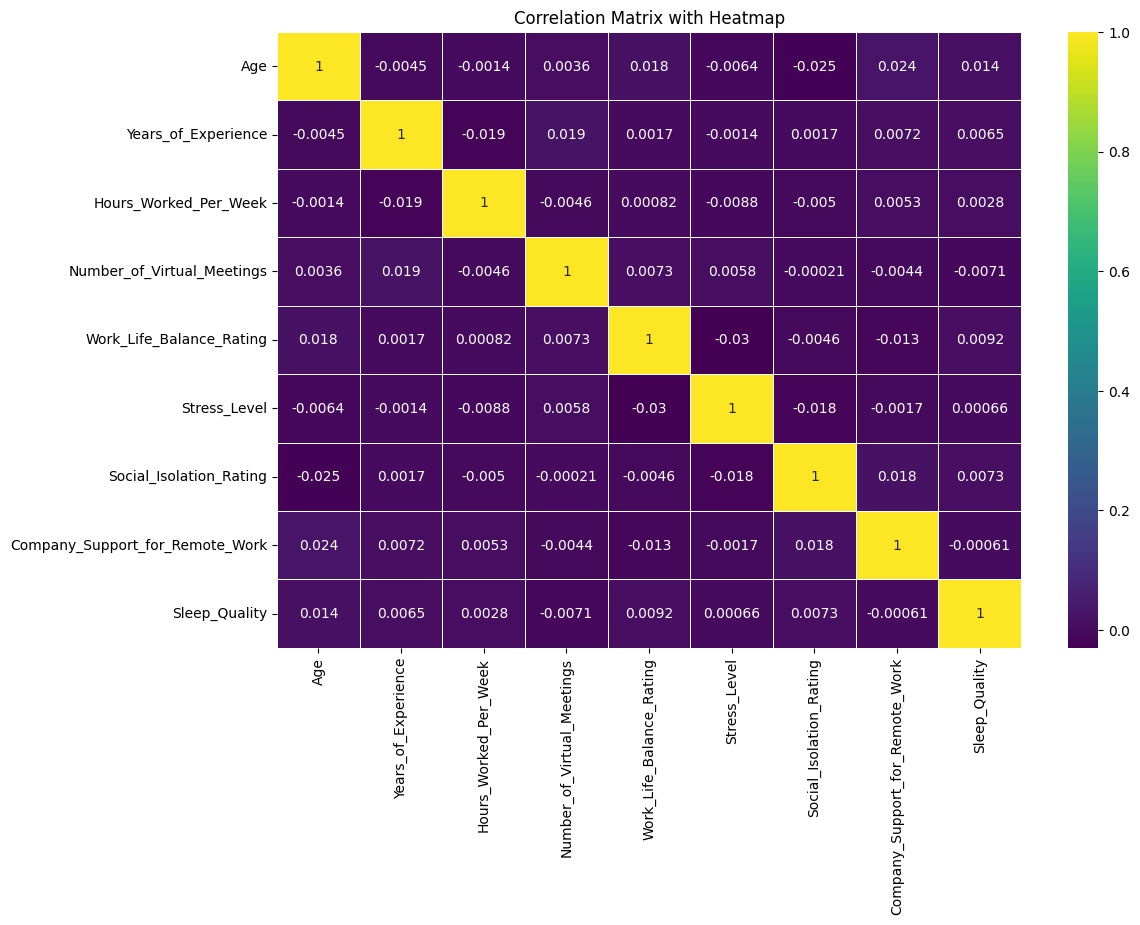

In [21]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)  # Replace 'viridis' with your preferred colormap
plt.title('Correlation Matrix with Heatmap')
plt.show()


<Figure size 1000x600 with 0 Axes>

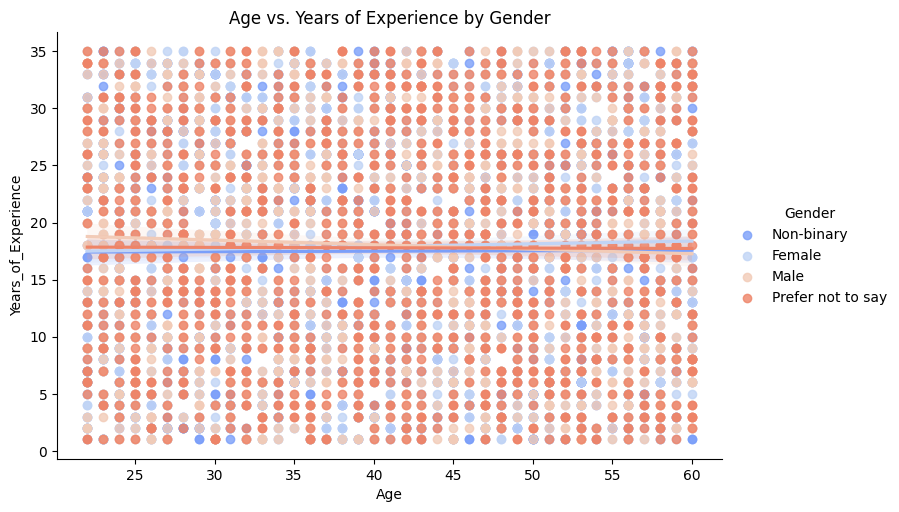

In [22]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Age', y='Years_of_Experience', hue='Gender', palette='coolwarm', aspect=1.5)
plt.title('Age vs. Years of Experience by Gender')
plt.show()


<Figure size 1000x600 with 0 Axes>

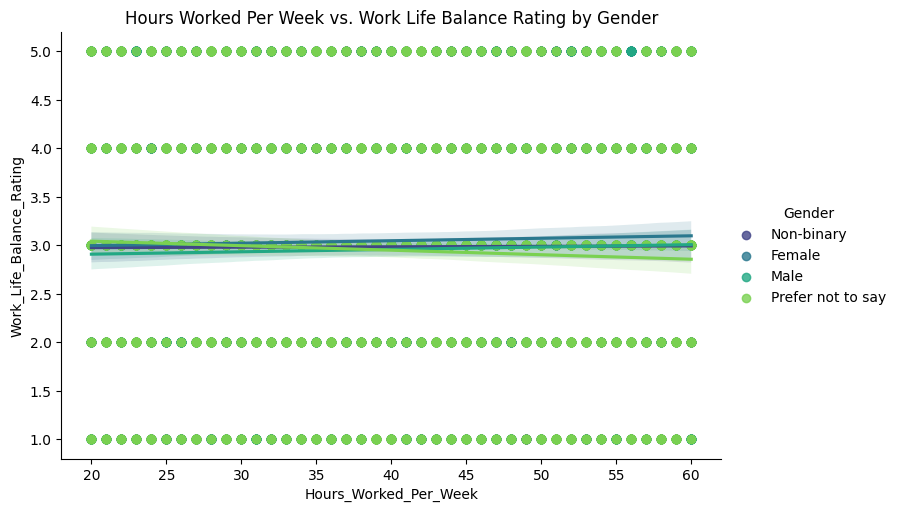

In [23]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Hours_Worked_Per_Week', y='Work_Life_Balance_Rating', hue='Gender', palette='viridis', aspect=1.5)
plt.title('Hours Worked Per Week vs. Work Life Balance Rating by Gender')
plt.show()


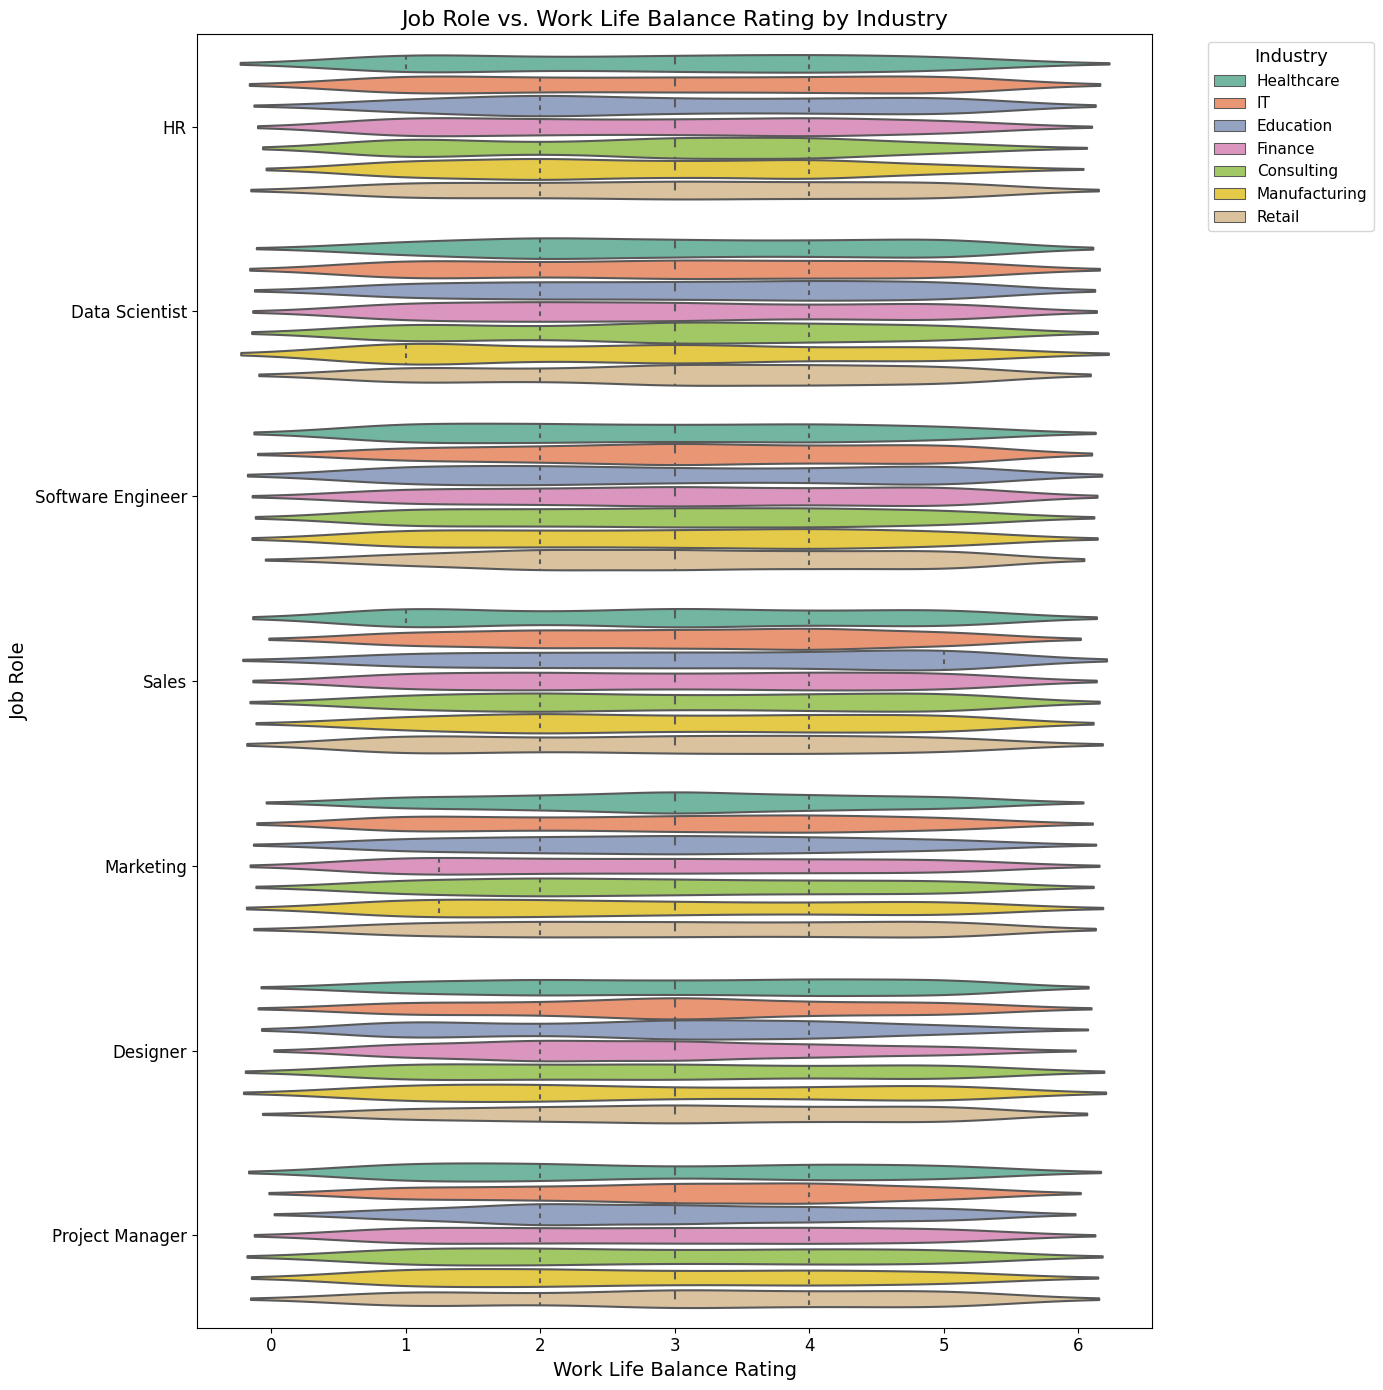

In [24]:
plt.figure(figsize=(14, 14))
sns.violinplot(data=df, x='Work_Life_Balance_Rating', y='Job_Role', hue='Industry', palette='Set2', inner="quartile", dodge=True)
plt.title('Job Role vs. Work Life Balance Rating by Industry', fontsize=16)
plt.xlabel('Work Life Balance Rating', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.legend(title='Industry', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()